# Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pandas.api.types import CategoricalDtype
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, auc, mean_squared_error, average_precision_score, confusion_matrix, f1_score, precision_score, precision_recall_curve, recall_score
from sklearn.metrics import roc_curve, mean_absolute_error, r2_score, classification_report, plot_confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from IPython.display import Image  
import graphviz 
import pydotplus
import seaborn as sns        

import xgboost as xgb
import joblib

from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn import metrics

pd.set_option('display.max_columns', None)

#Setting warning filters
import warnings
warnings.filterwarnings('ignore')

In [4]:
Model = []
Accuracy= []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []
def calculateScore(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen.append(TP / (TP + FN))
    Spe.append(TN / (FP + TN))
    FPR.append(FP / (FP + TN))
    FNR.append(FN / (FN + TP))

# Data Prep

In [ ]:
ls "drive/MyDrive/IDS575.38069 Machine Learning/PROJECT/575 datasets/"

ls: cannot access 'drive/MyDrive/IDS575.38069 Machine Learning/PROJECT/575 datasets/': No such file or directory


In [5]:
df=pd.read_csv('drive/MyDrive/OnlineNewsPopularity.csv')
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [6]:
# removing duplicates
df=df.drop_duplicates()

In [7]:
df=df.drop(['url',' timedelta'],axis=1)
df=df[df[' shares']<3000]

In [8]:
# Drop these items or rows with n_tokens_content = 0
df = df[df[' n_tokens_content'] != 0] 

In [9]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,29557.000000,29557.000000,29557.000000,2.955700e+04,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000
mean,10.415367,557.765842,0.547192,1.000000e+00,0.695015,10.680110,3.356125,4.234225,1.195825,4.692786,7.155834,0.051020,0.189735,0.168353,0.051392,0.184288,0.238861,26.267720,1100.349689,304.137030,12934.063335,750383.313597,252099.498788,1048.424425,5301.693775,2972.740102,3436.606189,9192.998165,5612.327495,0.169131,0.191799,0.192002,0.188348,0.143959,0.053964,0.060798,0.114761,0.184831,0.145504,0.236881,0.196708,0.236076,0.451626,0.121017,0.040395,0.017052,0.701148,0.298716,0.362262,0.098415,0.774544,-0.264244,-0.532631,-0.109776,0.273089,0.065637,0.342086,0.149321,1313.243259
std,2.104632,451.105202,0.100492,3.973646e-09,0.098830,10.498878,3.767311,7.933949,4.047511,0.281861,1.926764,0.220042,0.392098,0.374186,0.220800,0.387725,0.426395,69.778512,3621.147923,582.640560,58247.323963,217287.104207,130182.547335,1078.795541,5460.027721,1175.236091,17943.687660,37471.473544,22167.044935,0.374874,0.393722,0.393881,0.390996,0.351054,0.225950,0.238963,0.318739,0.262191,0.224937,0.294825,0.278006,0.288771,0.087700,0.095264,0.016250,0.010518,0.151535,0.151355,0.084744,0.069622,0.212992,0.119344,0.279640,0.092861,0.318236,0.256938,0.189045,0.219153,608.336985
min,2.000000,24.000000,0.114964,9.999999e-01,0.123214,0.000000,0.000000,0.000000,0.000000,3.624585,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.018182,0.018182,0.018182,0.018182,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,263.000000,0.479032,1.000000e+00,0.635236,5.000000,1.000000,1.000000,0.000000,4.500554,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,442.000000,140.125000,0.000000,843300.000000,171010.000000,0.000000,3498.957378,2318.003129,665.000000,1100.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025088,0.025017,0.028572,0.025311,0.028580,0.397135,0.061963,0.028933,0.010116,0.608696

In [9]:
def rng(x):
  if x<1000:
    y=1
  elif x>=1000 and x<2000:
    y=2
  else :
    y=3
  return y

df['rng']=df.apply(lambda x: rng(x[' shares']),axis =1)
fcolsc=df.columns.drop([' shares','rng'])
Y=df['rng'].values
X=df[fcolsc].values
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

 # .

# .

# DT Classifier

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)  # improved
dtc = dtc.fit(X_trainc, y_trainc)

In [ ]:
y_preddtc = dtc.predict(X_testc)
y_probdtc = dtc.predict_proba(X_testc)
y_preddtc

array([2, 1, 2, ..., 2, 2, 3])

In [ ]:
a=pd.DataFrame(y_preddtc,columns = ['pred'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
a1=a[a['y']==1]
a2=a[a['y']==2]
a3=a[a['y']==3]

print('total ',a.shape, a[a['pred']==a['y']].shape,  a[a['pred']==a['y']].shape[0]/a.shape[0]    , '\n ones', a1.shape, a1[a1['pred']==a1['y']].shape,  a1[a1['pred']==a1['y']].shape[0]/a1.shape[0]    , '\n twos', a2.shape, a2[a2['pred']==a2['y']].shape,  a2[a2['pred']==a2['y']].shape[0]/a2.shape[0]    ,  '\n threes', a3.shape, a3[a3['pred']==a3['y']].shape,  a3[a3['pred']==a3['y']].shape[0]/a3.shape[0]    )

total  (8868, 2) (3791, 2) 0.4274921064501579 
 ones (3309, 2) (1458, 2) 0.44061650045330913 
 twos (4056, 2) (1983, 2) 0.488905325443787 
 threes (1503, 2) (350, 2) 0.2328675981370592


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_testc, y_preddtc))

Accuracy: 0.4274921064501579


In [ ]:
importance = list(dtc.feature_importances_)
fea_dfdtc = pd.DataFrame({'columns':fcolsc,'importance':importance})
fea_dfdtc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfdtc.reset_index(drop=True,inplace=True)
# display(fea_dfdtc)
fea_dfdtc.head()

,columns,importance
0,kw_avg_avg,0.044777
1,kw_max_avg,0.036878
2,LDA_00,0.035944
3,avg_positive_polarity,0.035437
4,LDA_04,0.035376


In [ ]:

# print('Precision: %.3f' % precision_score(y_testc, y_preddtc,pos_label='positive',
#                                            average=None))


print(metrics.classification_report(y_testc, y_preddtc, digits=3))

              precision    recall  f1-score   support

           1      0.458     0.441     0.449      3309
           2      0.476     0.489     0.482      4056
           3      0.231     0.233     0.232      1503

    accuracy                          0.427      8868
   macro avg      0.388     0.387     0.388      8868
weighted avg      0.428     0.427     0.427      8868



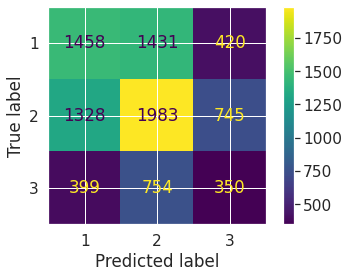

In [ ]:
#confusion matrix
plot_confusion_matrix(dtc,X_testc, y_testc)

In [ ]:
Model.append('DTC')
Accuracy.append(accuracy_score(y_testc,y_preddtc))
F1Score.append(f1_score(y_testc,y_preddtc,average=None))

# .

# .

# RF Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                       class_weight=None, ccp_alpha=0.0, max_samples=None)

rfc.fit(X_trainc, y_trainc)
print(rfc.predict(X_testc))

[2 1 2 ... 1 2 2]


In [ ]:
y_predrf=rfc.predict(X_testc)
a=pd.DataFrame(y_predrf,columns = ['pred'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
a1=a[a['y']==1]
a2=a[a['y']==2]
a3=a[a['y']==3]

print('total ',a.shape, a[a['pred']==a['y']].shape,  a[a['pred']==a['y']].shape[0]/a.shape[0]    , '\n ones', a1.shape, a1[a1['pred']==a1['y']].shape,  a1[a1['pred']==a1['y']].shape[0]/a1.shape[0]    , '\n twos', a2.shape, a2[a2['pred']==a2['y']].shape,  a2[a2['pred']==a2['y']].shape[0]/a2.shape[0]    ,  '\n threes', a3.shape, a3[a3['pred']==a3['y']].shape,  a3[a3['pred']==a3['y']].shape[0]/a3.shape[0]    )

total  (8868, 2) (4626, 2) 0.5216508795669824 
 ones (3309, 2) (1695, 2) 0.5122393472348141 
 twos (4056, 2) (2880, 2) 0.7100591715976331 
 threes (1503, 2) (51, 2) 0.033932135728542916


In [ ]:
# get_params(deep=True)
print(rfc.predict(X_testc))
print(rfc.predict_log_proba(X_testc))
print(rfc.predict_proba(X_testc))
print(rfc.score(X_testc, y_testc, sample_weight=None))
# set_params(**params)

[2 1 2 ... 1 2 2]
[[-1.23787436 -0.7985077  -1.34707365]
 [-0.75502258 -0.84397007 -2.30258509]
 [-1.46967597 -0.40047757 -2.30258509]
 ...
 [-0.40047757 -1.2039728  -3.5065579 ]
 [-1.51412773 -0.4780358  -1.83258146]
 [-1.27296568 -0.7985077  -1.30933332]]
[[0.29 0.45 0.26]
 [0.47 0.43 0.1 ]
 [0.23 0.67 0.1 ]
 ...
 [0.67 0.3  0.03]
 [0.22 0.62 0.16]
 [0.28 0.45 0.27]]
0.5216508795669824


In [ ]:
importance = list(rfc.feature_importances_)
fea_dfrfc = pd.DataFrame({'columns':fcolsc,'importance':importance})
fea_dfrfc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfrfc.reset_index(drop=True,inplace=True)
# display(fea_dfrfc)
fea_dfrfc.head()

,columns,importance
0,kw_avg_avg,0.034621
1,kw_max_avg,0.033240
2,LDA_04,0.030547
3,average_token_length,0.029418
4,kw_avg_max,0.029397


In [ ]:
#classification report
print(metrics.classification_report(y_testc, y_predrf, digits=3))


              precision    recall  f1-score   support

           1      0.550     0.512     0.530      3309
           2      0.507     0.710     0.591      4056
           3      0.510     0.034     0.064      1503

    accuracy                          0.522      8868
   macro avg      0.522     0.419     0.395      8868
weighted avg      0.523     0.522     0.479      8868



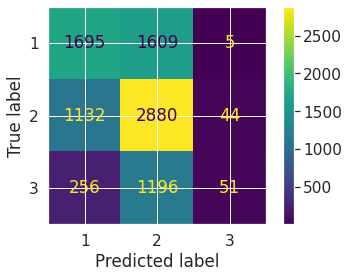

In [ ]:
plot_confusion_matrix(rfc,X_testc,y_testc )

In [ ]:
Model.append('RFC')
Accuracy.append(accuracy_score(y_testc,y_predrf))
F1Score.append(f1_score(y_testc,y_predrf,average=None))

# .

# .

# XGBoost

In [10]:
eval_set = [(X_trainc,y_trainc),(X_testc,y_testc)]

gbm =xgb.XGBClassifier(colsample_bytree=0.7124764668841469, gamma=2,  n_jobs=-1, learning_rate=0.015, max_depth=3, min_child_weight=5,
                       n_estimators=500, objective='multi:softprob', random_state=0, reg_alpha=0.614806300623195,num_class =3, nthread=6,
                       reg_lambda=0.561957773132362, subsample=0.7487974845003919)

gbm.fit(X_trainc,y_trainc,eval_metric= "mlogloss",verbose=False,eval_set=eval_set)


XGBClassifier(colsample_bytree=0.7124764668841469, gamma=2, learning_rate=0.015,
              min_child_weight=5, n_estimators=500, n_jobs=-1, nthread=6,
              num_class=3, objective='multi:softprob',
              reg_alpha=0.614806300623195, reg_lambda=0.561957773132362,
              subsample=0.7487974845003919)

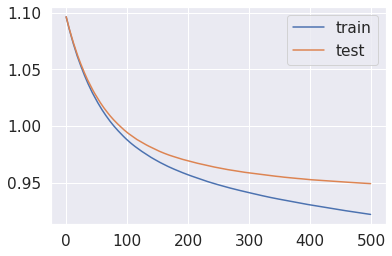

In [ ]:
%matplotlib inline
results = gbm.evals_result()
fig, ax = plt.subplots()

ax.plot(results['validation_0']['mlogloss'],label="train")
ax.plot(results['validation_1']['mlogloss'],label="test")
ax.legend(loc="upper right")


In [ ]:
#prediction 
train_pred_prob = gbm.predict_proba(X_trainc,ntree_limit=100)
test_pred_prob = gbm.predict_proba(X_testc,ntree_limit=100)

In [ ]:
y_predgbm = gbm.predict(X_testc,ntree_limit=300)
y_predgbm

array([2, 1, 2, ..., 1, 2, 2])

In [ ]:
a=pd.DataFrame(y_predgbm,columns = ['pred'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
a1=a[a['y']==1]
a2=a[a['y']==2]
a3=a[a['y']==3]

print('total ',a.shape, a[a['pred']==a['y']].shape,  a[a['pred']==a['y']].shape[0]/a.shape[0]    , '\n ones', a1.shape, a1[a1['pred']==a1['y']].shape,  a1[a1['pred']==a1['y']].shape[0]/a1.shape[0]    , '\n twos', a2.shape, a2[a2['pred']==a2['y']].shape,  a2[a2['pred']==a2['y']].shape[0]/a2.shape[0]    ,  '\n threes', a3.shape, a3[a3['pred']==a3['y']].shape,  a3[a3['pred']==a3['y']].shape[0]/a3.shape[0]    )

total  (8868, 2) (4659, 2) 0.5253721244925575 
 ones (3309, 2) (1669, 2) 0.504381988516168 
 twos (4056, 2) (2989, 2) 0.7369329388560157 
 threes (1503, 2) (1, 2) 0.0006653359946773121


In [ ]:
importance = list(gbm.feature_importances_)
fea_dfxc = pd.DataFrame({'columns':fcolsc,'importance':importance})
fea_dfxc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfxc.reset_index(drop=True,inplace=True)
# display(fea_dfxc)
fea_dfxc.head()

,columns,importance
0,is_weekend,0.064377
1,data_channel_is_entertainment,0.048923
2,data_channel_is_tech,0.046521
3,data_channel_is_socmed,0.043825
4,self_reference_avg_sharess,0.037724


In [ ]:
#classification report
print(metrics.classification_report(y_testc, y_predgbm, digits=3))


              precision    recall  f1-score   support

           1      0.561     0.504     0.531      3309
           2      0.508     0.737     0.601      4056
           3      0.333     0.001     0.001      1503

    accuracy                          0.525      8868
   macro avg      0.467     0.414     0.378      8868
weighted avg      0.498     0.525     0.473      8868



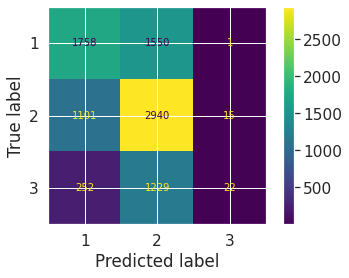

In [ ]:
plot_confusion_matrix(gbm,X_testc,y_testc)

In [ ]:
Model.append('GBM')
Accuracy.append(accuracy_score(y_testc,y_predgbm))
F1Score.append(f1_score(y_testc,y_predgbm,average=None))

In [12]:
import sklearn
print(sklearn.__version__)

1.0.2


In [14]:
from sklearn.experimental import enable_halving_search_cv 

Hyperparameter Tuning Grid:

In [16]:

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import StratifiedKFold

In [17]:
params = {
        'min_child_weight': [5, 10, 15],
        'gamma': [1, 1.5, 2, 5, 8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [21]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(gbm, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_trainc,y_trainc), verbose=3, random_state=1001 )

In [22]:
random_search.fit(X_trainc, y_trainc)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f46ce8a6850>,
                   estimator=XGBClassifier(colsample_bytree=0.7124764668841469,
                                           gamma=2, learning_rate=0.015,
                                           min_child_weight=5, n_estimators=500,
                                           n_jobs=-1, nthread=6, num_class=3,
                                           objective='multi:softprob',
                                           reg_alpha=0.614806300623195,
                                           reg_lambda=0.561957773132362,
                                           subsample=0.7487974845003919),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [1, 1.5, 2, 5, 8],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [5, 10, 15],


In [27]:
gbm_pred=random_search.predict(X_testc)

In [28]:
#classification report
print(metrics.classification_report(y_testc, gbm_pred, digits=3))

              precision    recall  f1-score   support

           1      0.565     0.517     0.540      3309
           2      0.512     0.735     0.603      4056
           3      0.583     0.005     0.009      1503

    accuracy                          0.530      8868
   macro avg      0.553     0.419     0.384      8868
weighted avg      0.544     0.530     0.479      8868



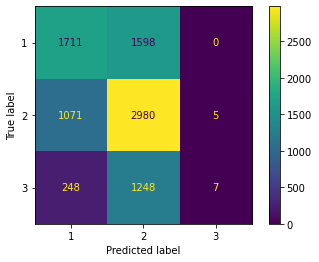

In [29]:
plot_confusion_matrix(random_search,X_testc,y_testc)

In [25]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([182.25930219, 270.06081767, 265.36097765, 208.49051204,
       219.79769239]), 'std_fit_time': array([ 1.99037444,  0.86734241,  2.66624504,  2.28316388, 49.83160956]), 'mean_score_time': array([0.00806427, 0.00080271, 0.0009233 , 0.00070505, 0.00067334]), 'std_score_time': array([7.90793964e-03, 8.18396769e-05, 2.78416621e-04, 4.02336986e-05,
       8.35648651e-05]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[10, 5, 10, 10, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[8, 2, 1.5, 8, 1.5],
             mask=[False, False, False

# .

# .

# LogReg

In [ ]:
logreg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
logreg.fit(X_trainc, y_trainc)
y_predlog = logreg.predict(X_testc)
print(logreg.score(X_trainc, y_trainc))
print(logreg.score(X_testc, y_testc))


0.4776451254289719
0.475191700496166


In [ ]:
logreg.predict_proba(X_testc)

array([[0.37159973, 0.43456551, 0.19383476],
       [0.44767637, 0.43086344, 0.12146019],
       [0.44681223, 0.42886326, 0.12432451],
       ...,
       [0.43067131, 0.43949011, 0.12983858],
       [0.31486281, 0.49318404, 0.19195315],
       [0.4150367 , 0.44143058, 0.14353272]])

In [ ]:
a=pd.DataFrame(y_predlog,columns = ['pred'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
a1=a[a['y']==1]
a2=a[a['y']==2]
a3=a[a['y']==3]

print('total ',a.shape, a[a['pred']==a['y']].shape,  a[a['pred']==a['y']].shape[0]/a.shape[0]    , '\n ones', a1.shape, a1[a1['pred']==a1['y']].shape,  a1[a1['pred']==a1['y']].shape[0]/a1.shape[0]    , '\n twos', a2.shape, a2[a2['pred']==a2['y']].shape,  a2[a2['pred']==a2['y']].shape[0]/a2.shape[0]    ,  '\n threes', a3.shape, a3[a3['pred']==a3['y']].shape,  a3[a3['pred']==a3['y']].shape[0]/a3.shape[0]    )

total  (8868, 2) (4214, 2) 0.475191700496166 
 ones (3309, 2) (556, 2) 0.16802659413720158 
 twos (4056, 2) (3657, 2) 0.9016272189349113 
 threes (1503, 2) (1, 2) 0.0006653359946773121


In [ ]:
#Confusion matrix
confusion_matrix(y_testc, y_predlog)

array([[ 556, 2736,   17],
       [ 389, 3657,   10],
       [  98, 1404,    1]])

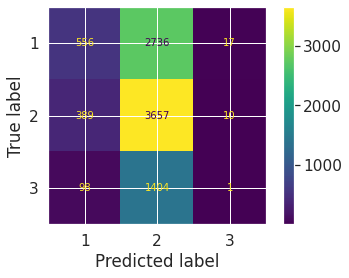

In [ ]:
plot_confusion_matrix(logreg, X_testc, y_testc)

In [ ]:
print(classification_report(y_testc, y_predlog))

              precision    recall  f1-score   support

           1       0.53      0.17      0.26      3309
           2       0.47      0.90      0.62      4056
           3       0.04      0.00      0.00      1503

    accuracy                           0.48      8868
   macro avg       0.35      0.36      0.29      8868
weighted avg       0.42      0.48      0.38      8868



In [ ]:
Model.append('LR')
Accuracy.append(accuracy_score(y_testc,y_predlog))
F1Score.append(f1_score(y_testc,y_predlog,average=None))

# .

# .

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_class=GaussianNB()
naive_class.fit(X_trainc, y_trainc)
naive_class_pred = naive_class.predict(X_testc)

In [ ]:
print(accuracy_score(y_testc,naive_class_pred))
print(f1_score(y_testc,naive_class_pred,average=None))

0.39636896707262065
[0.53519984 0.23295455 0.20169361]


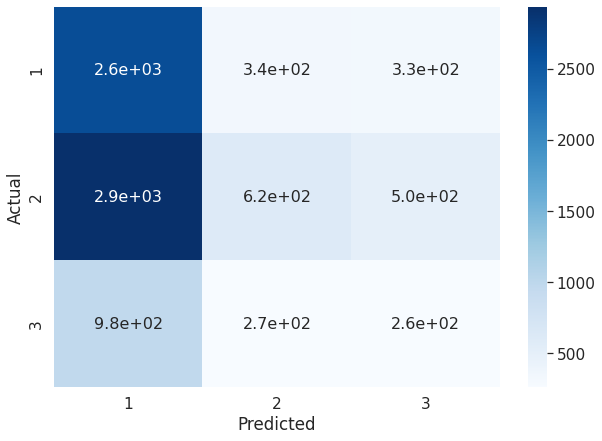

In [ ]:
data = confusion_matrix(y_testc,naive_class_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_testc), index = np.unique(y_testc))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [ ]:
print(classification_report(y_testc, naive_class_pred))

              precision    recall  f1-score   support

           1       0.40      0.80      0.54      3309
           2       0.50      0.15      0.23      4056
           3       0.24      0.17      0.20      1503

    accuracy                           0.40      8868
   macro avg       0.38      0.37      0.32      8868
weighted avg       0.42      0.40      0.34      8868



In [ ]:
Model.append('Naive')
Accuracy.append(accuracy_score(y_testc,naive_class_pred))
F1Score.append(f1_score(y_testc,naive_class_pred,average=None))

# .

# .

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_trainc, y_trainc)
knn_pred = knn.predict(X_testc)

In [ ]:
print(accuracy_score(y_testc,knn_pred))
print(f1_score(y_testc,knn_pred,average=None))

0.4471132160577357
[0.46787879 0.50835964 0.06143345]


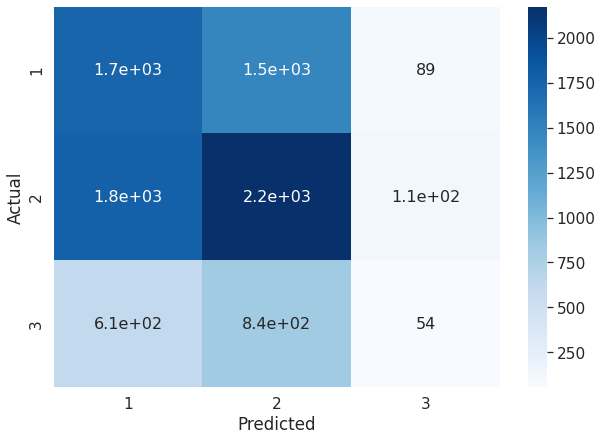

In [ ]:
data = confusion_matrix(y_testc,knn_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_testc), index = np.unique(y_testc))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [ ]:
print(classification_report(y_testc, knn_pred))

              precision    recall  f1-score   support

           1       0.42      0.52      0.47      3309
           2       0.48      0.54      0.51      4056
           3       0.21      0.04      0.06      1503

    accuracy                           0.45      8868
   macro avg       0.37      0.37      0.35      8868
weighted avg       0.41      0.45      0.42      8868



In [ ]:
Model.append('KNN')
Accuracy.append(accuracy_score(y_testc,knn_pred))
F1Score.append(f1_score(y_testc,knn_pred,average=None))

In [ ]:
compare_mod = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score,'Sensitivity':Sen,'Specificity':Spe,'FPR':FPR,'FNR':FNR})
compare_mod

ValueError: ignored

# .

# .

# SVM

In [11]:
linear_svm=svm.SVC(kernel='linear')
linear_svm.fit(X_trainc, y_trainc)
svm_pred = linear_svm.predict(X_testc)

accuracy 0.4659449706811006
Classification Report 
               precision    recall  f1-score   support

           1       0.49      0.17      0.25      3309
           2       0.47      0.87      0.61      4056
           3       0.26      0.03      0.05      1503

    accuracy                           0.47      8868
   macro avg       0.41      0.36      0.30      8868
weighted avg       0.44      0.47      0.38      8868



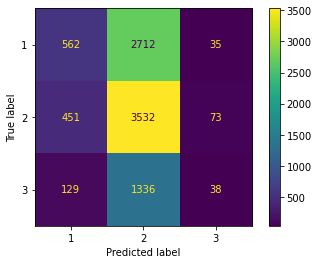

In [12]:
predicted_linear_svm=linear_svm.predict(X_testc)
print("accuracy",accuracy_score(y_testc, predicted_linear_svm))
plot_confusion_matrix(linear_svm, X_testc, y_testc)
print("Classification Report \n", classification_report(y_testc, svm_pred))